In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['enroll_sanity_check.txt', 'aggregates', 'elsect', 'nde', 'states_all.csv', 'sanity_check.txt', 'nces_enroll', 'states_all_extended.csv']


In [2]:
data = pd.read_csv("../input/states_all.csv")
print(data.columns)

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')


In [3]:
rev_data = data[['STATE', 'TOTAL_REVENUE']]
rev_data = data.groupby('STATE')['TOTAL_REVENUE'].mean()
rev_data = rev_data.reset_index()
rev_data = rev_data.sort_values('TOTAL_REVENUE', ascending=False)
rev_data.head()

,STATE,TOTAL_REVENUE
11,CALIFORNIA,55799199.28
54,NEW_YORK,42385624.88
69,TEXAS,36879455.60
62,PENNSYLVANIA,21397652.48
33,ILLINOIS,21272992.48


In [4]:
exp_data = data[['STATE', 'TOTAL_EXPENDITURE']]
exp_data = data.groupby('STATE')['TOTAL_EXPENDITURE'].mean()
exp_data = exp_data.reset_index()
exp_data = exp_data.sort_values('TOTAL_EXPENDITURE', ascending=False)
exp_data.head()

,STATE,TOTAL_EXPENDITURE
11,CALIFORNIA,56247851.32
54,NEW_YORK,44201162.80
69,TEXAS,38347089.88
62,PENNSYLVANIA,21813791.52
33,ILLINOIS,21444064.84


First want to make a graph representing each state and its total education revenue and expenditure

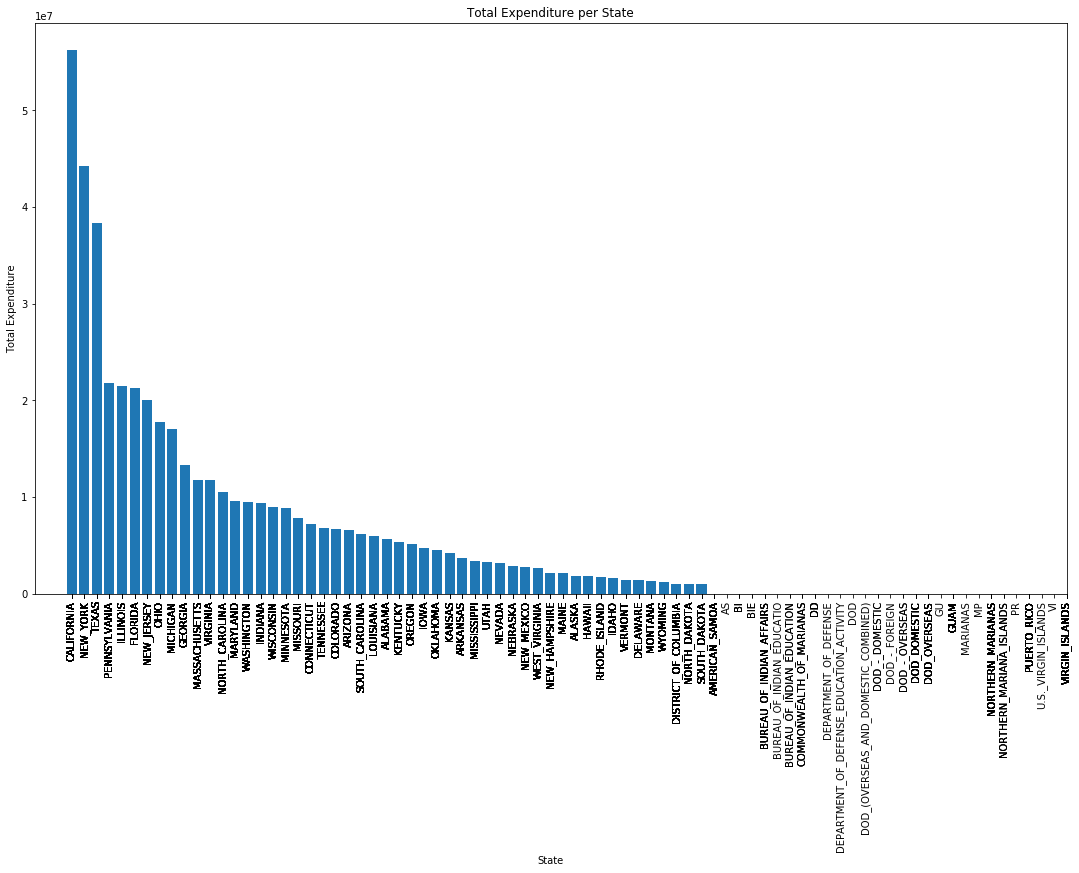

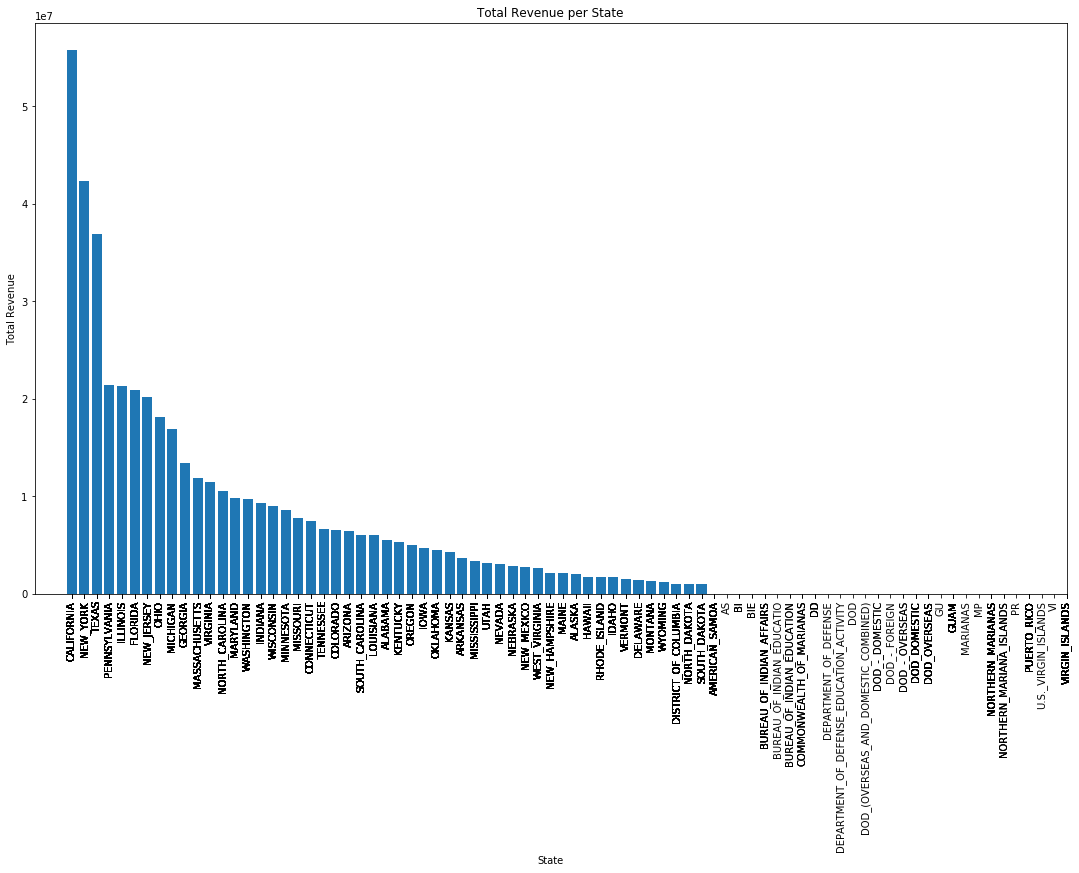

In [7]:
plt.bar(exp_data.STATE, exp_data.TOTAL_EXPENDITURE)
plt.xlabel('State')
plt.ylabel('Total Expenditure')
plt.xticks(data.STATE, rotation=90)
plt.title("Total Expenditure per State")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()


plt.bar(exp_data.STATE, rev_data.TOTAL_REVENUE)
plt.xlabel('State')
plt.ylabel('Total Revenue')
plt.xticks(data.STATE, rotation=90)
plt.title("Total Revenue per State")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()



**need to figure out how to make axes less blury

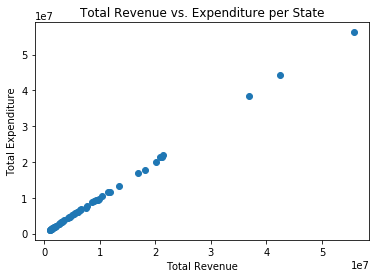

In [8]:
plt.scatter(rev_data["TOTAL_REVENUE"],exp_data["TOTAL_EXPENDITURE"])
plt.xlabel("Total Revenue")
plt.ylabel("Total Expenditure")
plt.title("Total Revenue vs. Expenditure per State")
plt.show()

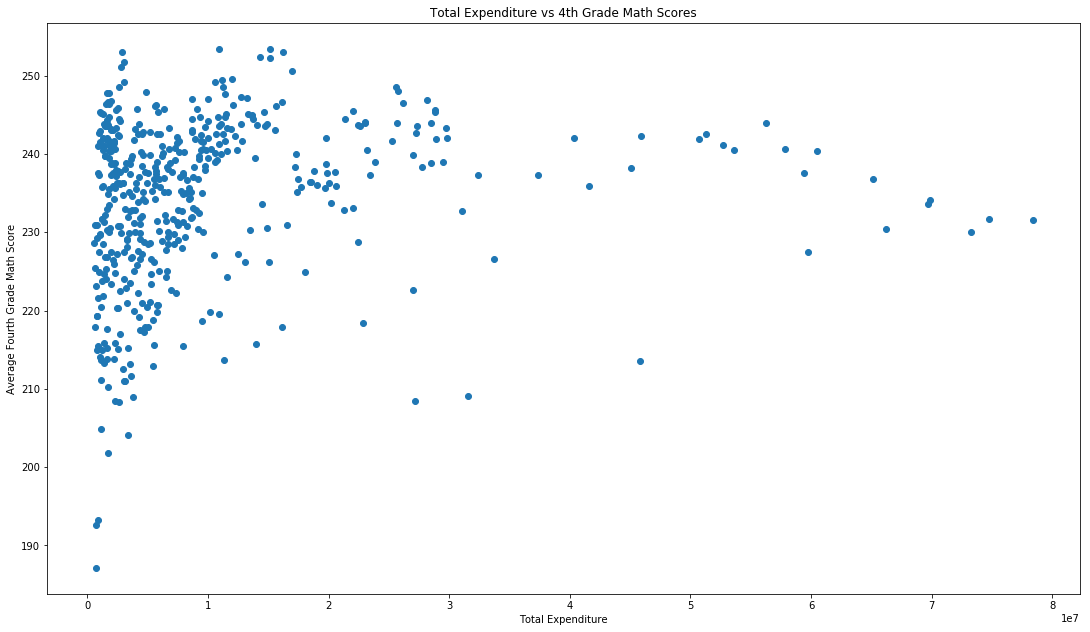

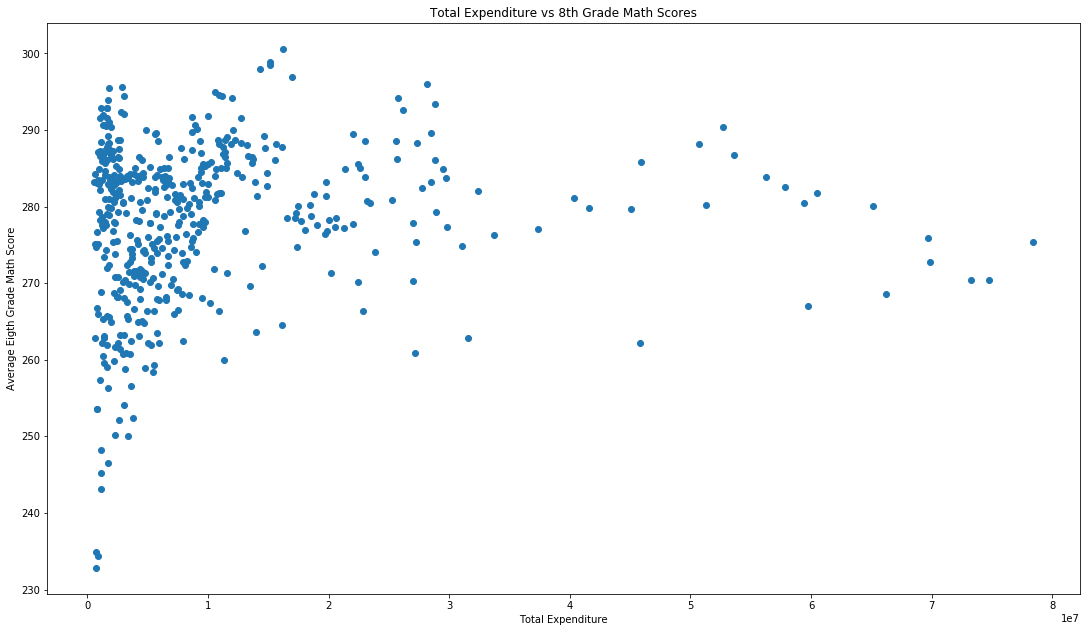

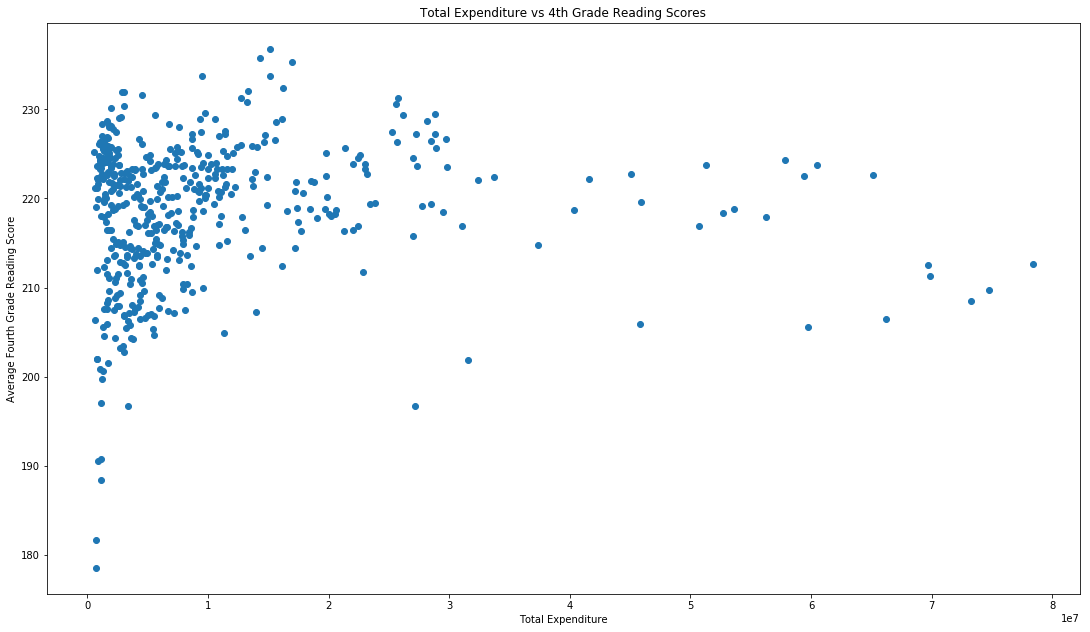

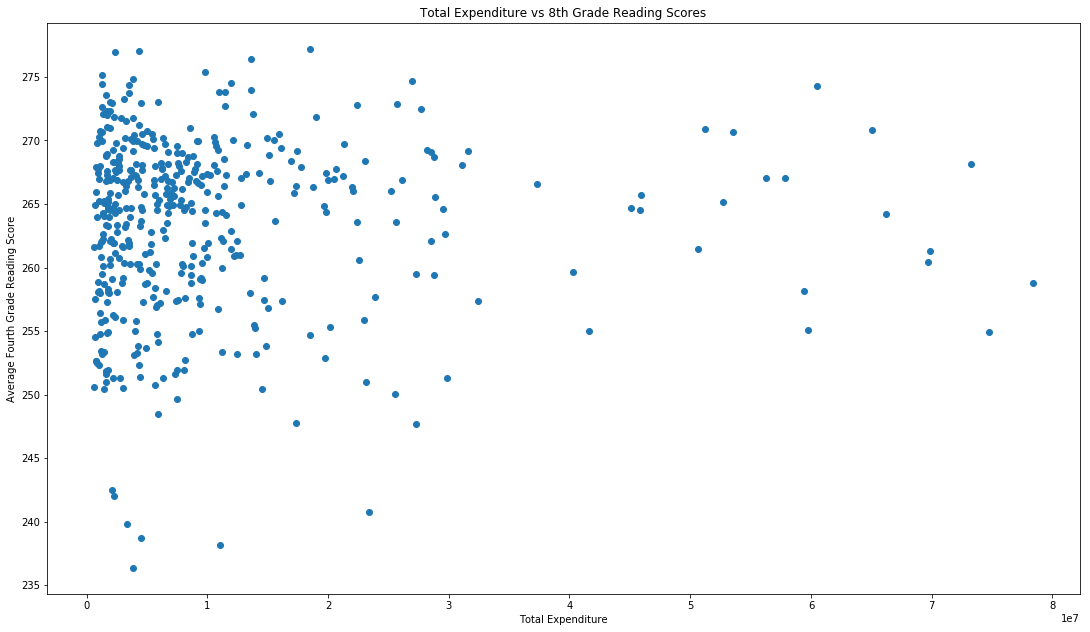

In [14]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.scatter( data.TOTAL_EXPENDITURE, data.AVG_MATH_4_SCORE)
plt.xlabel('Total Expenditure')
plt.ylabel('Average Fourth Grade Math Score')
plt.title("Total Expenditure vs 4th Grade Math Scores")
plt.show()

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.scatter( data.TOTAL_EXPENDITURE, data.AVG_MATH_8_SCORE)
plt.xlabel('Total Expenditure')
plt.ylabel('Average Eigth Grade Math Score')
plt.title("Total Expenditure vs 8th Grade Math Scores")
plt.show()

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.scatter( data.TOTAL_EXPENDITURE, data.AVG_READING_4_SCORE)
plt.xlabel('Total Expenditure')
plt.ylabel('Average Fourth Grade Reading Score')
plt.title("Total Expenditure vs 4th Grade Reading Scores")
plt.show()

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.scatter( data.TOTAL_EXPENDITURE, data.AVG_READING_8_SCORE)
plt.xlabel('Total Expenditure')
plt.ylabel('Average Fourth Grade Reading Score')
plt.title("Total Expenditure vs 8th Grade Reading Scores")
plt.show()

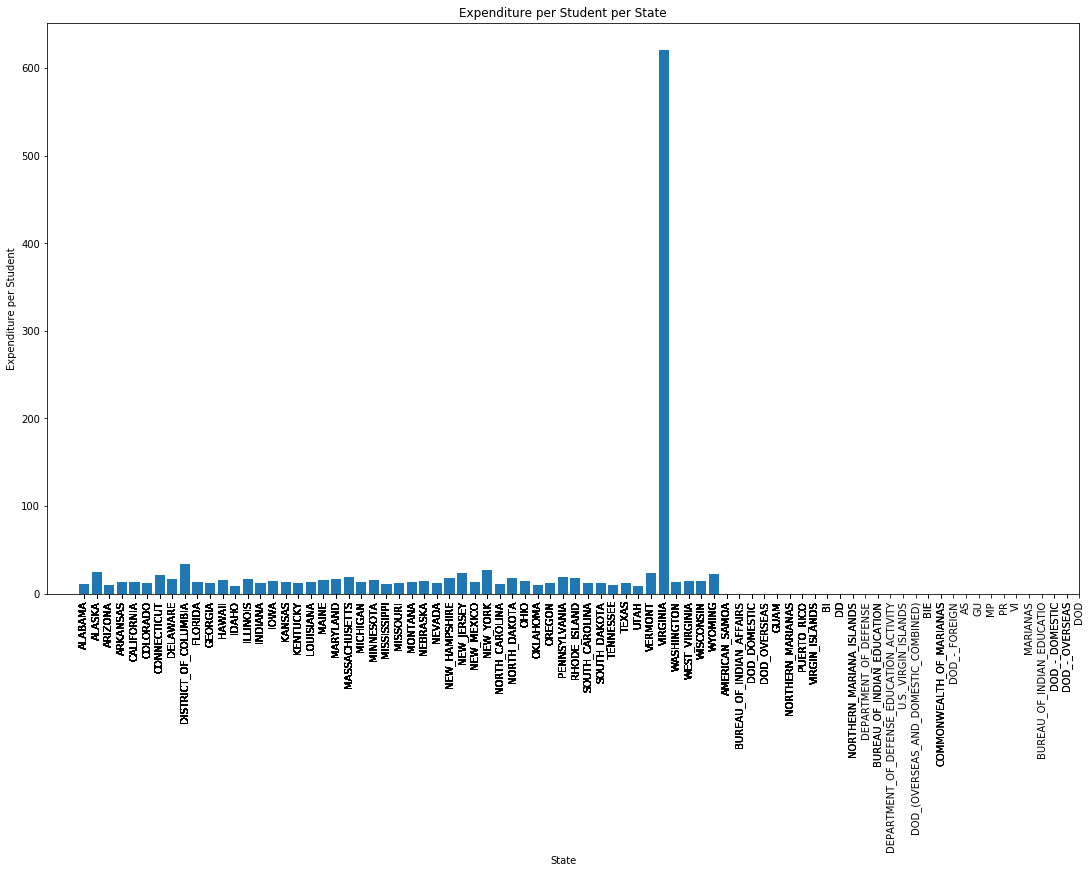

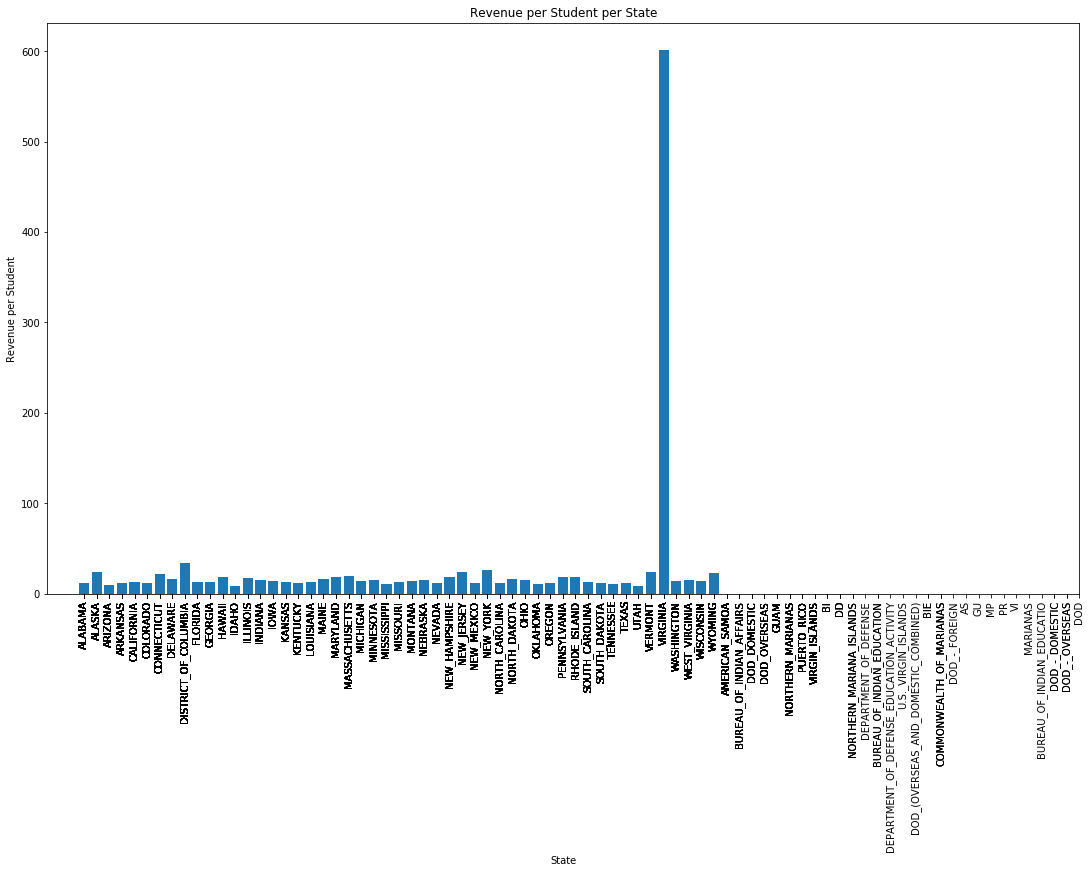

In [17]:
data['avg_rev'] = data['TOTAL_REVENUE']/data['GRADES_ALL_G']
data['avg_exp'] = data['TOTAL_EXPENDITURE']/data['GRADES_ALL_G']

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.bar(data.STATE, data.avg_exp)
plt.xticks(data.STATE, rotation=90)
plt.xlabel('State')
plt.ylabel('Expenditure per Student')
plt.title("Expenditure per Student per State")
plt.show()

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.bar(data.STATE, data.avg_rev)
plt.xticks(data.STATE, rotation=90)
plt.xlabel('State')
plt.ylabel('Revenue per Student')
plt.title("Revenue per Student per State")
plt.show()

**need to figure out how to remove virginia from the data

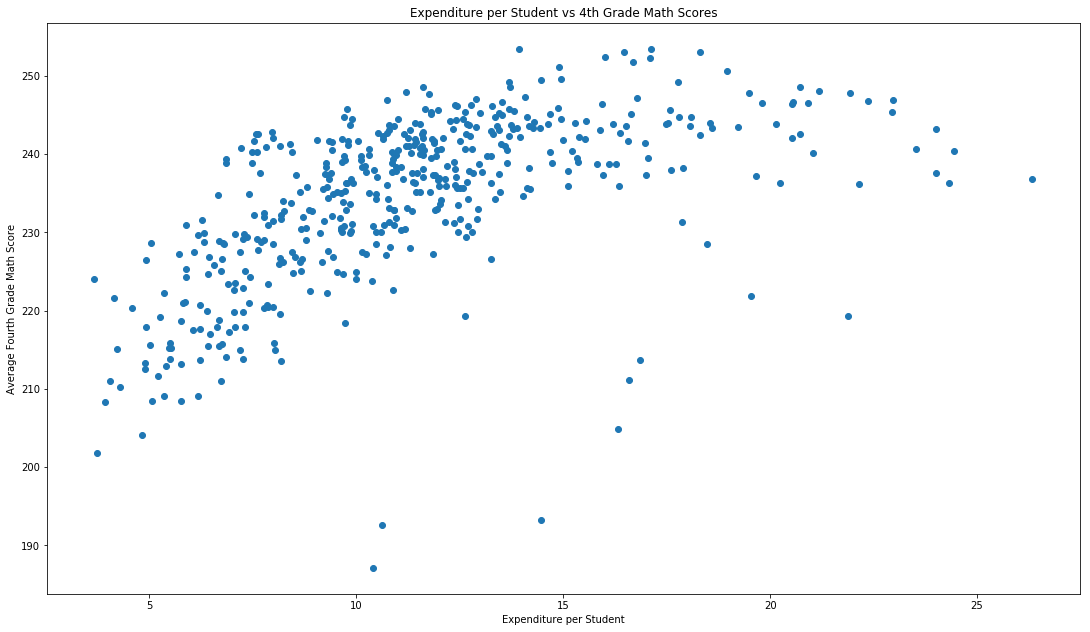

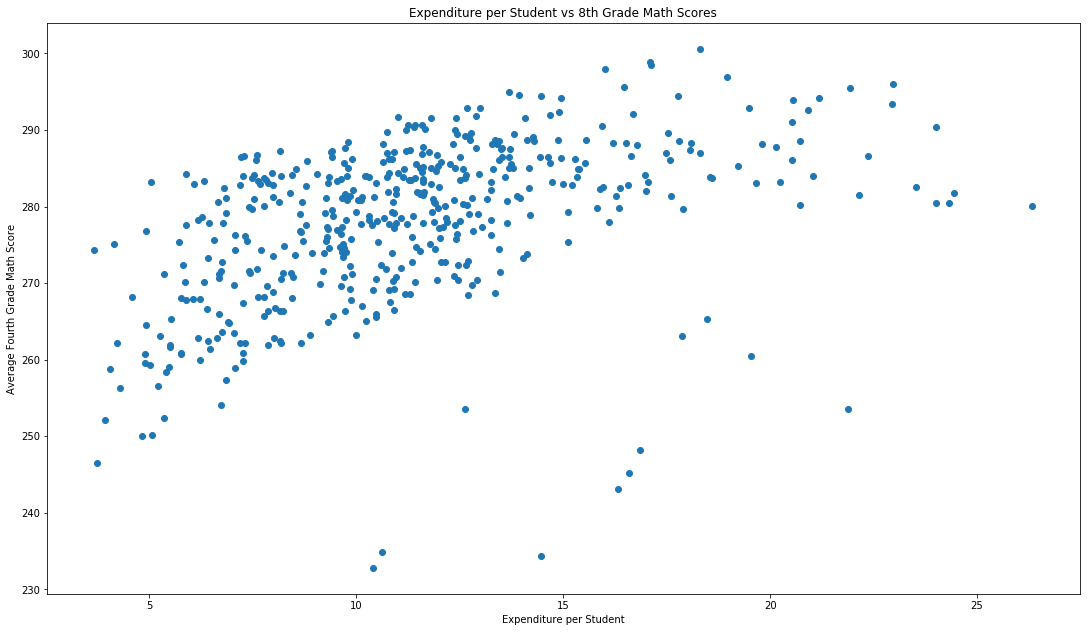

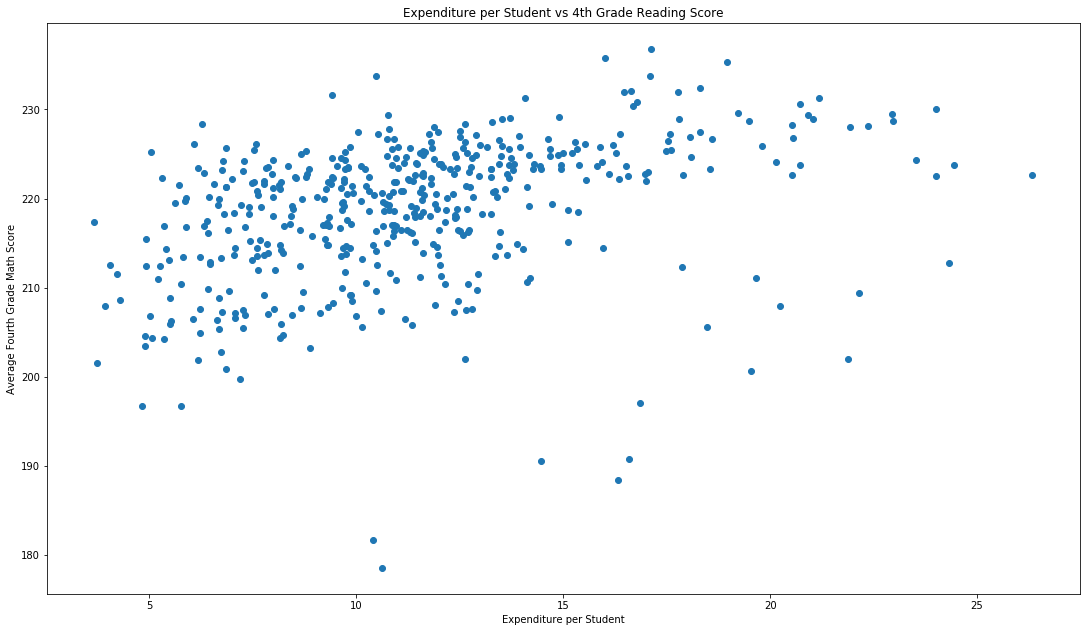

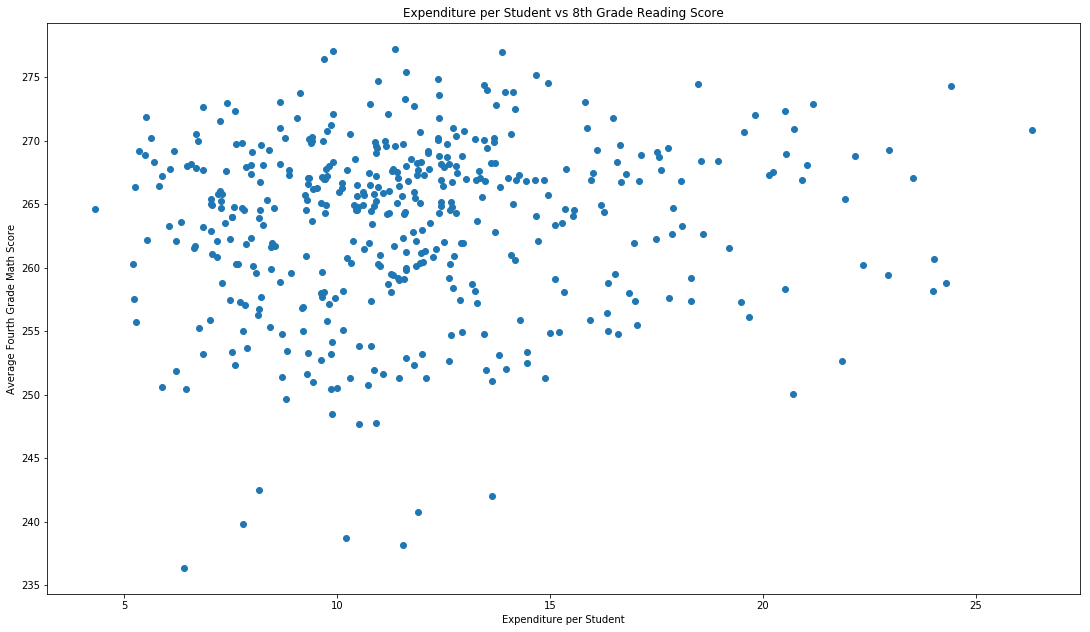

In [18]:
plt.scatter( data.avg_exp, data.AVG_MATH_4_SCORE)
plt.xlabel('Expenditure per Student')
plt.ylabel('Average Fourth Grade Math Score')
plt.title("Expenditure per Student vs 4th Grade Math Scores")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

plt.scatter( data.avg_exp, data.AVG_MATH_8_SCORE)
plt.xlabel('Expenditure per Student')
plt.ylabel('Average Fourth Grade Math Score')
plt.title("Expenditure per Student vs 8th Grade Math Scores")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

plt.scatter( data.avg_exp, data.AVG_READING_4_SCORE)
plt.xlabel('Expenditure per Student')
plt.ylabel('Average Fourth Grade Math Score')
plt.title("Expenditure per Student vs 4th Grade Reading Score")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

plt.scatter( data.avg_exp, data.AVG_READING_8_SCORE)
plt.xlabel('Expenditure per Student')
plt.ylabel('Average Fourth Grade Math Score')
plt.title("Expenditure per Student vs 8th Grade Reading Score")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

**need to figure out how to measure the correlation between average expenditure per student vs test scores
